In [1]:
%reset
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import datetime
from tsf_bmw.uvtsf import UVariateTimeSeriesForecaster
from tsf_bmw.tools import moving_linreg
from plotly.plotly import plot_mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
%matplotlib inline
from random import sample

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<Figure size 640x480 with 1 Axes>

##### Read in the data

In [2]:
try:
    ts_univ = pd.read_csv('../data/AMZN.csv', index_col='Date', usecols=['Date','Adj Close'], parse_dates=True)
    print ( "====================================\nData: data of shape " + str(ts_univ.shape) + " has been read in." ) 
except IOError as e:
    print("Could not read in the data: {}".format(e))

Data: data of shape (4475, 1) has been read in.


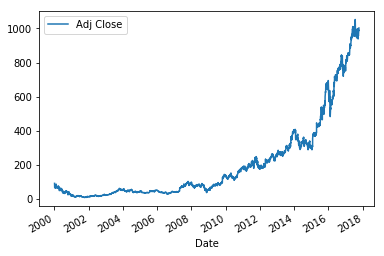

In [3]:
ts_univ.plot()

##### Create UVariateTimeSeriesForecaster

Applying log10 transform.
Using time series data of range: 2000-01-03 00:00:00 - 2017-10-13 00:00:00 and shape: (4475, 1)
The object is initialized!
Timse series resampled at frequency: <Day>. New shape of data: (6494, 1)


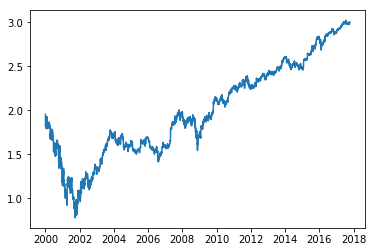

In [4]:
uv_tsf = UVariateTimeSeriesForecaster(dict({'ts_df':ts_univ, 'time_format': "%Y-%m-%d %H:%M:%S", 'freq':'D', 'transform': 'log10',  'p_train':0.9}))
uv_tsf.ts_resample()
plt.plot(uv_tsf.ts_df)

In [ ]:
uv_tsf.ts_decompose(params=dict({'model':'additive'}))
uv_tsf.plot_decompose()
plt.plot(uv_tsf.model['seasonal'].iloc[1:20, ])
plt.gcf ().autofmt_xdate ()

In [ ]:
method='auto_arima'
dict_params = dict()
dict_params = {
    'd': 0,
}

In [ ]:
method='es'
dict_params = dict()

dict_params = {
    'trend': 'additive',
    'seasonal': True,
    'seasonal_periods': 12,
    'smoothing_level': 0.2,
    'use_boxcox':True,
    'damped': False}

In [5]:
method = 'prophet'
dict_params = {
    'interval_width': 0.95,
    'yearly_seasonality': True,
    'weekly_seasonality': False,
    'monthly_seasonality': True,
    'quarterly_seasonality': False,
    'daily_seasonality': True,
    'weekend_seasonality': True,
    'changepoint_prior_scale': 0.001,
    'consider_holidays':True,
    'country': 'US',
    'diagnose': True,
    'horizon': '365 days',
    'period': '180 days'
}

In [6]:
if len(dict_params):
    uv_tsf.ts_fit ( method=method, dict_params=dict_params ) 
else:
    uv_tsf.ts_fit ( method=method ) 

Trying to fit the Prophet model....
...via using parameters

                                0
interval_width               0.95
yearly_seasonality           True
weekly_seasonality          False
monthly_seasonality          True
quarterly_seasonality       False
daily_seasonality            True
weekend_seasonality          True
changepoint_prior_scale     0.001
consider_holidays            True
country                        US
diagnose                     True
horizon                  365 days
period                   180 days
state                        None
changepoint_range             0.9
add_change_points            True
Considering holidays for country US:

             ds                      holiday  lower_window  upper_window
0    1999-12-31    New Year's Day (Observed)             0             0
1    2000-01-01               New Year's Day             0             0
2    2000-01-17  Martin Luther King, Jr. Day             0             0
3    2000-02-21        Washingt

C:\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Time elapsed: 7.248691082000732
Holidays included:

0       New Year's Day (Observed)
1                  New Year's Day
2     Martin Luther King, Jr. Day
3           Washington's Birthday
4                    Memorial Day
5                Independence Day
6                       Labor Day
7                    Columbus Day
8         Veterans Day (Observed)
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12    Independence Day (Observed)
13       Christmas Day (Observed)
dtype: object
Model successfully fitted to the data!


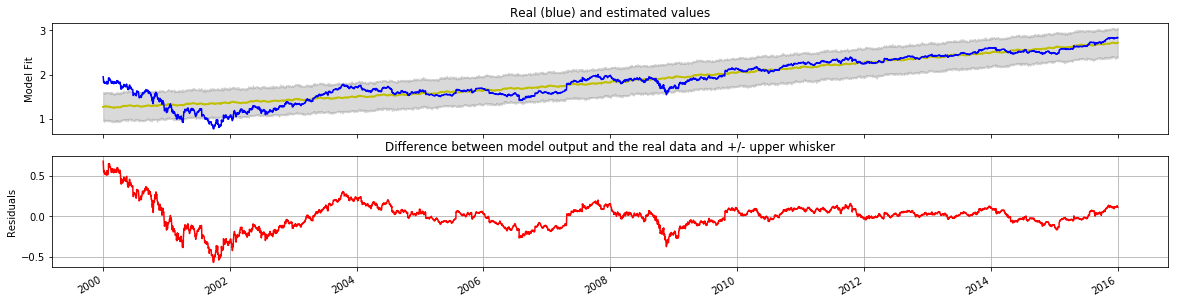

Run cross validation y/n? Note, depending on parameters provided this can take some time... y


Running cross validation using parameters provided....


INFO:fbprophet:Making 25 forecasts with cutoffs between 2003-03-06 00:00:00 and 2015-01-02 00:00:00


Time elapsed: 200.43244624137878
Following time windows and cutoffs have been set-up:

           forecast_start forecast_till
cutoff                                 
2003-03-06     2003-03-07    2004-03-05
2003-09-02     2003-09-03    2004-09-01
2004-02-29     2004-03-01    2005-02-28
2004-08-27     2004-08-28    2005-08-27
2005-02-23     2005-02-24    2006-02-23
2005-08-22     2005-08-23    2006-08-22
2006-02-18     2006-02-19    2007-02-18
2006-08-17     2006-08-18    2007-08-17
2007-02-13     2007-02-14    2008-02-13
2007-08-12     2007-08-13    2008-08-11
2008-02-08     2008-02-09    2009-02-07
2008-08-06     2008-08-07    2009-08-06
2009-02-02     2009-02-03    2010-02-02
2009-08-01     2009-08-02    2010-08-01
2010-01-28     2010-01-29    2011-01-28
2010-07-27     2010-07-28    2011-07-27
2011-01-23     2011-01-24    2012-01-23
2011-07-22     2011-07-23    2012-07-21
2012-01-18     2012-01-19    2013-01-17
2012-07-16     2012-07-17    2013-07-16
2013-01-12     2013-01-13    2014

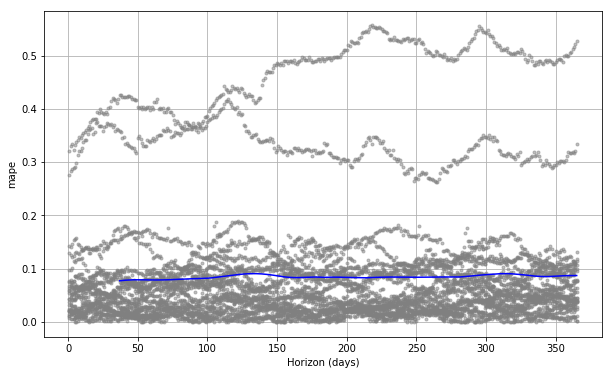

In [7]:
uv_tsf.ts_diagnose()

In [ ]:
uv_tsf.plot_residuals()

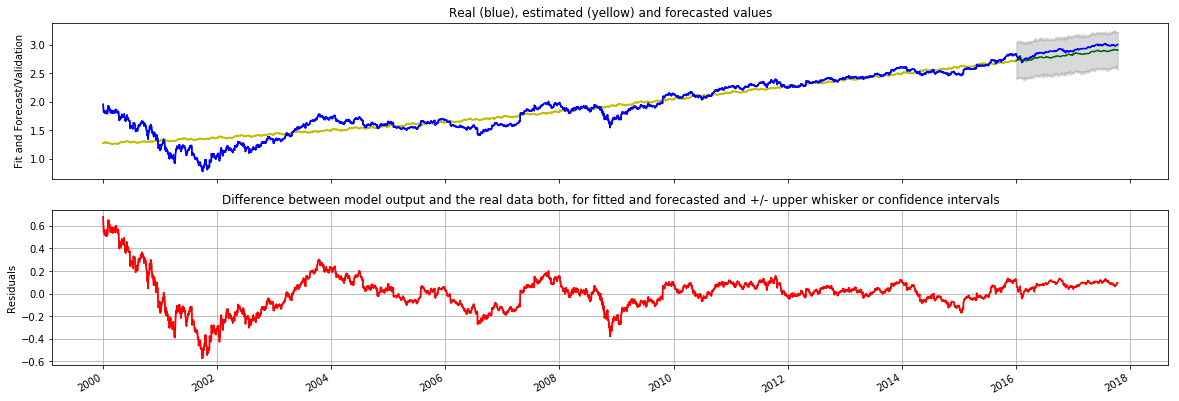

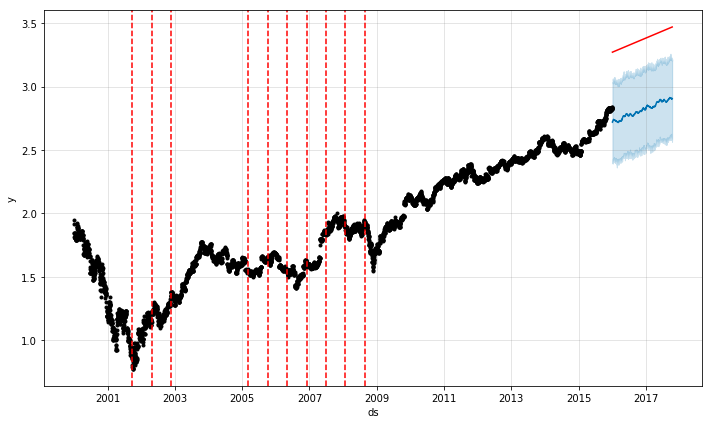

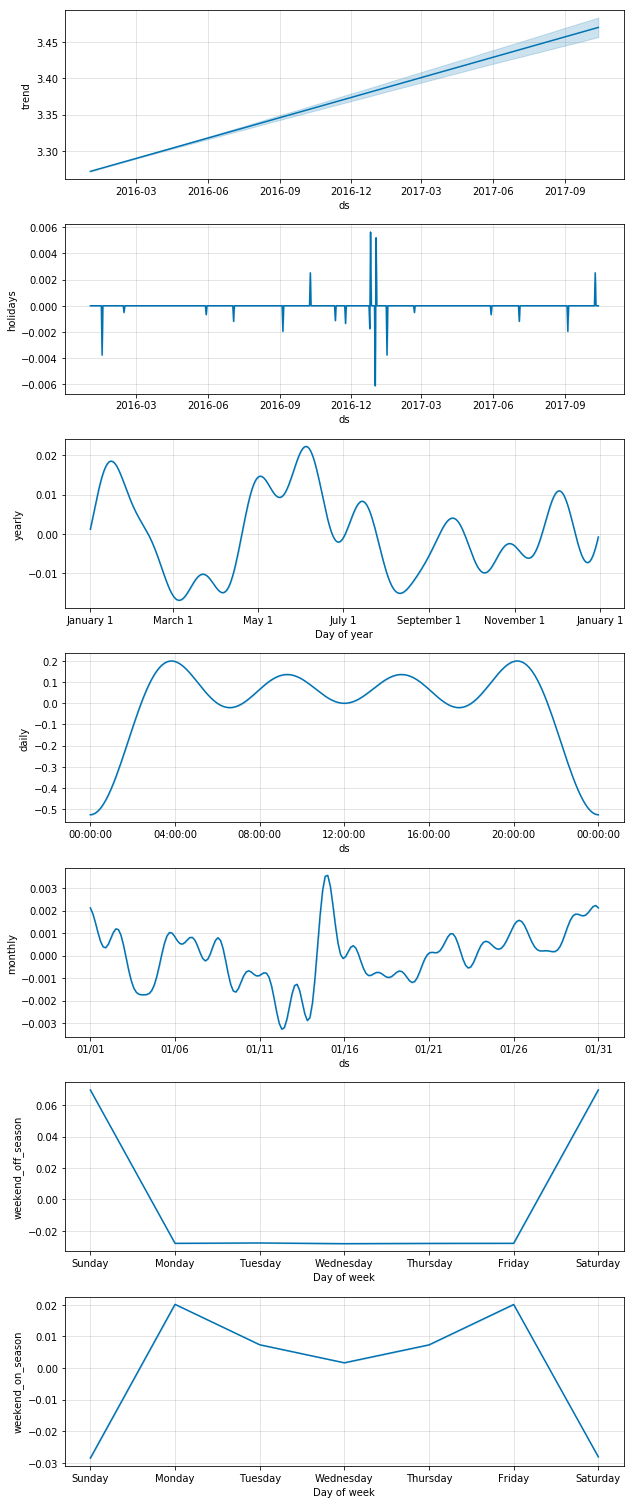

In [8]:
uv_tsf.ts_test()

In [ ]:
uv_tsf.ts_forecast(n_forecast = 50)